Accuracy: 0.6666666666666666


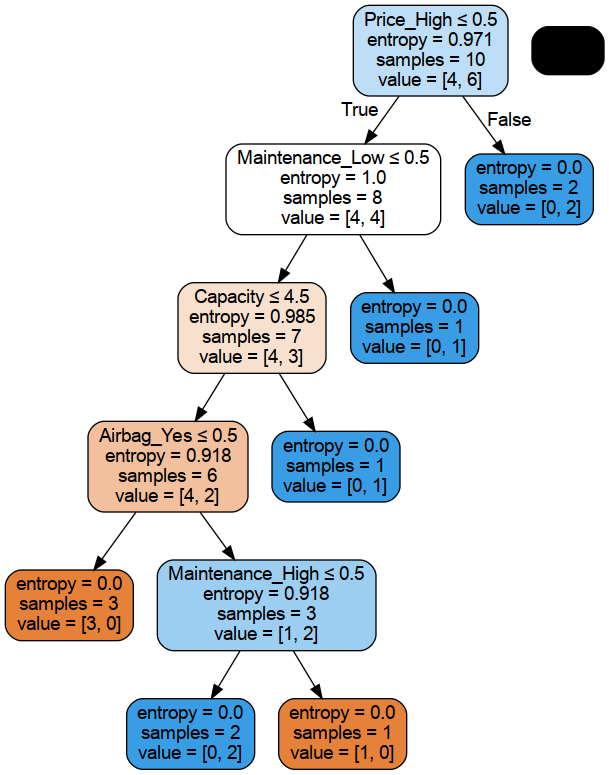

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from io import StringIO
from IPython.display import Image  
import pydotplus


data = {
    'Price': ['Low', 'Low', 'Low', 'Low', 'Low', 'Med', 'Med', 'Med', 'Med', 'High', 'High', 'High', 'High'],
    'Maintenance': ['Low', 'Med', 'Low', 'Med', 'High', 'Med', 'Med', 'High', 'High', 'Med', 'Med', 'High', 'High'],
    'Capacity': ['2', '4', '4', '4', '4', '4', '4', '2', '5', '4', '2', '2', '5'],
    'Airbag': ['No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes'],
    'Profitable': [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

df = pd.get_dummies(df, columns=['Price', 'Maintenance', 'Airbag'])

X = df.drop('Profitable', axis=1)
y = df['Profitable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
